In [1]:
# A linear regression learning algorithm example using TensorFlow library.

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 2500
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
tf.compat.v1.disable_eager_execution()

# tf Graph Input
X = tf.compat.v1.placeholder("float")
Y = tf.compat.v1.placeholder("float")

In [6]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [7]:
# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

In [8]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

W0114 16:03:58.073910 4647830976 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
# Initializing the variables
init = tf.compat.v1.initialize_all_variables()

W0114 16:03:58.138929 4647830976 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


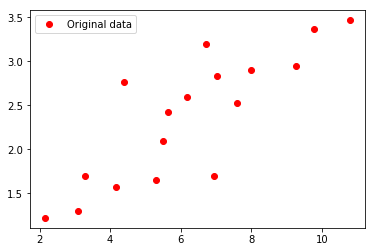

In [12]:
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.legend()
    plt.show()

Epoch: 0001 cost= 0.256077856 W= 0.5014652 b= -0.630294
Epoch: 0051 cost= 0.190221399 W= 0.43774596 b= -0.55208826
Epoch: 0101 cost= 0.177137554 W= 0.42655566 b= -0.47158626
Epoch: 0151 cost= 0.165564597 W= 0.41603088 b= -0.3958717
Epoch: 0201 cost= 0.155328140 W= 0.40613204 b= -0.32465985
Epoch: 0251 cost= 0.146274000 W= 0.39682195 b= -0.25768393
Epoch: 0301 cost= 0.138265610 W= 0.38806555 b= -0.1946914
Epoch: 0351 cost= 0.131182164 W= 0.37983 b= -0.13544503
Epoch: 0401 cost= 0.124916948 W= 0.37208417 b= -0.079722494
Epoch: 0451 cost= 0.119375437 W= 0.36479917 b= -0.027313959
Epoch: 0501 cost= 0.114474125 W= 0.35794726 b= 0.021977553
Epoch: 0551 cost= 0.110139020 W= 0.35150304 b= 0.06833745
Epoch: 0601 cost= 0.106304809 W= 0.3454419 b= 0.11194015
Epoch: 0651 cost= 0.102913603 W= 0.33974144 b= 0.15294957
Epoch: 0701 cost= 0.099914268 W= 0.33437988 b= 0.19151989
Epoch: 0751 cost= 0.097261511 W= 0.32933727 b= 0.22779639
Epoch: 0801 cost= 0.094915383 W= 0.32459444 b= 0.26191548
Epoch: 085

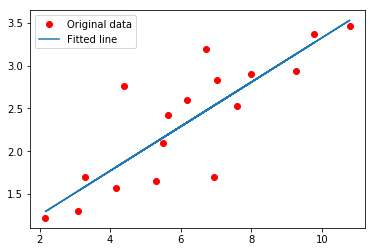

In [13]:
# Launch the graph
with tf.compat.v1.Session() as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()